<a href="https://colab.research.google.com/github/jiyun126/-/blob/main/2021142033_%ED%95%9C%EC%A7%80%EC%9C%A4_6%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/machine learning/Social_Network_Ads.csv')

In [3]:
X = df[['Age', 'EstimatedSalary']].values  # x1, x2
y = df['Purchased'].values  # y

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    epsilon = 1e-5
    return (-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon)).mean()

def gradient_descent(X, y, weights, lr, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (h - y)) / m
        weights -= lr * gradient
        cost_history.append(cost_function(X, y, weights))

    return weights, cost_history

In [6]:
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
initial_weights = np.zeros(X_train_bias.shape[1])

In [7]:
weights, cost_history = gradient_descent(X_train_bias, y_train, initial_weights, lr=0.01, iterations=10000)

<ipython-input-5-c8b48ea57cd6>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [8]:
w0, w1, w2 = weights
print("경사하강법으로 구한 파라미터:")
print("w0 =", w0)
print("w1 =", w1)
print("w2 =", w2)

경사하강법으로 구한 파라미터:
w0 = -8.917499999999771
w1 = -51.55545312500092
w2 = 34.53125


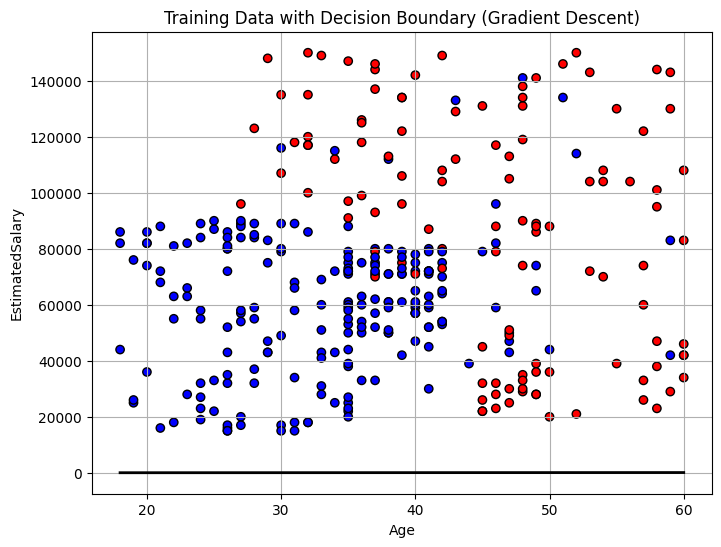

In [9]:
def plot_decision_boundary(X, y, weights, title):
    x1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    x2 = -(weights[0] + weights[1]*x1) / weights[2]

    plt.figure(figsize=(8,6))
    plt.scatter(X[:,1], X[:,2], c=y, cmap='bwr', edgecolors='k')
    plt.plot(x1, x2, color='black', linewidth=2)
    plt.xlabel('Age')
    plt.ylabel('EstimatedSalary')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_train_bias, y_train, weights, 'Training Data with Decision Boundary (Gradient Descent)')

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("\nScikit-learn 모델 파라미터:")
print("w0 (intercept) =", model.intercept_[0])
print("w1, w2 (coefficients) =", model.coef_[0])


Scikit-learn 모델 파라미터:
w0 (intercept) = -11.403675054524063
w1, w2 (coefficients) = [2.07808219e-01 3.54979001e-05]


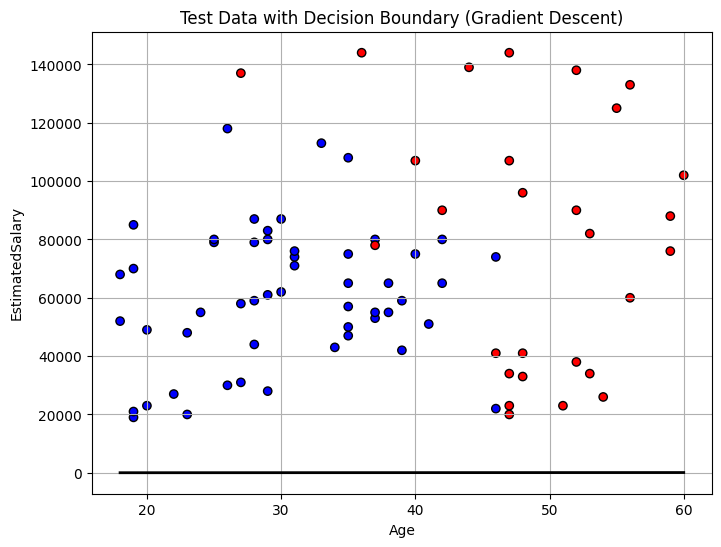

In [11]:
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
plot_decision_boundary(X_test_bias, y_test, weights, 'Test Data with Decision Boundary (Gradient Descent)')

In [13]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nScikit-learn 모델 정확도 (테스트 데이터 기준):", accuracy)


Scikit-learn 모델 정확도 (테스트 데이터 기준): 0.8875
